In [385]:
%matplotlib inline
import pandas as pd
import matplotlib as plt

In [364]:
ames = pd.read_csv("train.csv")

In [365]:
df = ames[['GarageType', "GarageCars","GarageCond","PavedDrive", "WoodDeckSF", "OpenPorchSF","EnclosedPorch","ScreenPorch", "YrSold", "SaleType", "SaleCondition", "SalePrice"]]

In [257]:
# GarageType - Garage or no Garage
# GarageCars
# GarageCond - further investigate
# PavedDrive - dummify them
# OpenPorchSF +
# EnclosedPorch + 
# ScreenPorch +
# YrSold
# SaleCondition Investigate Subgroups
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [366]:
#GarageType - Garage or no Garage 
df.loc[:,('GarageType')] = list(map(str, df['GarageType']))
replacements = {"nan": 'N',
                'Attchd': 'Y',
                'Detchd': 'Y',
                 'BuiltIn': 'Y',
                'CarPort': 'Y',
                'Basment': 'Y',
                '2Types': 'Y'}
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
df.loc[:,('GarageType')]= [replace_all(l, replacements) for l in df['GarageType']]

In [367]:
#GarageType - Garage or no Garage  part 2
df['GarageType'] = [0 if x == 'N' else 1 for x in df.GarageType]
df['GarageType'].value_counts()

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    1379
0      81
Name: GarageType, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027733A32D88>,
      dtype=object)

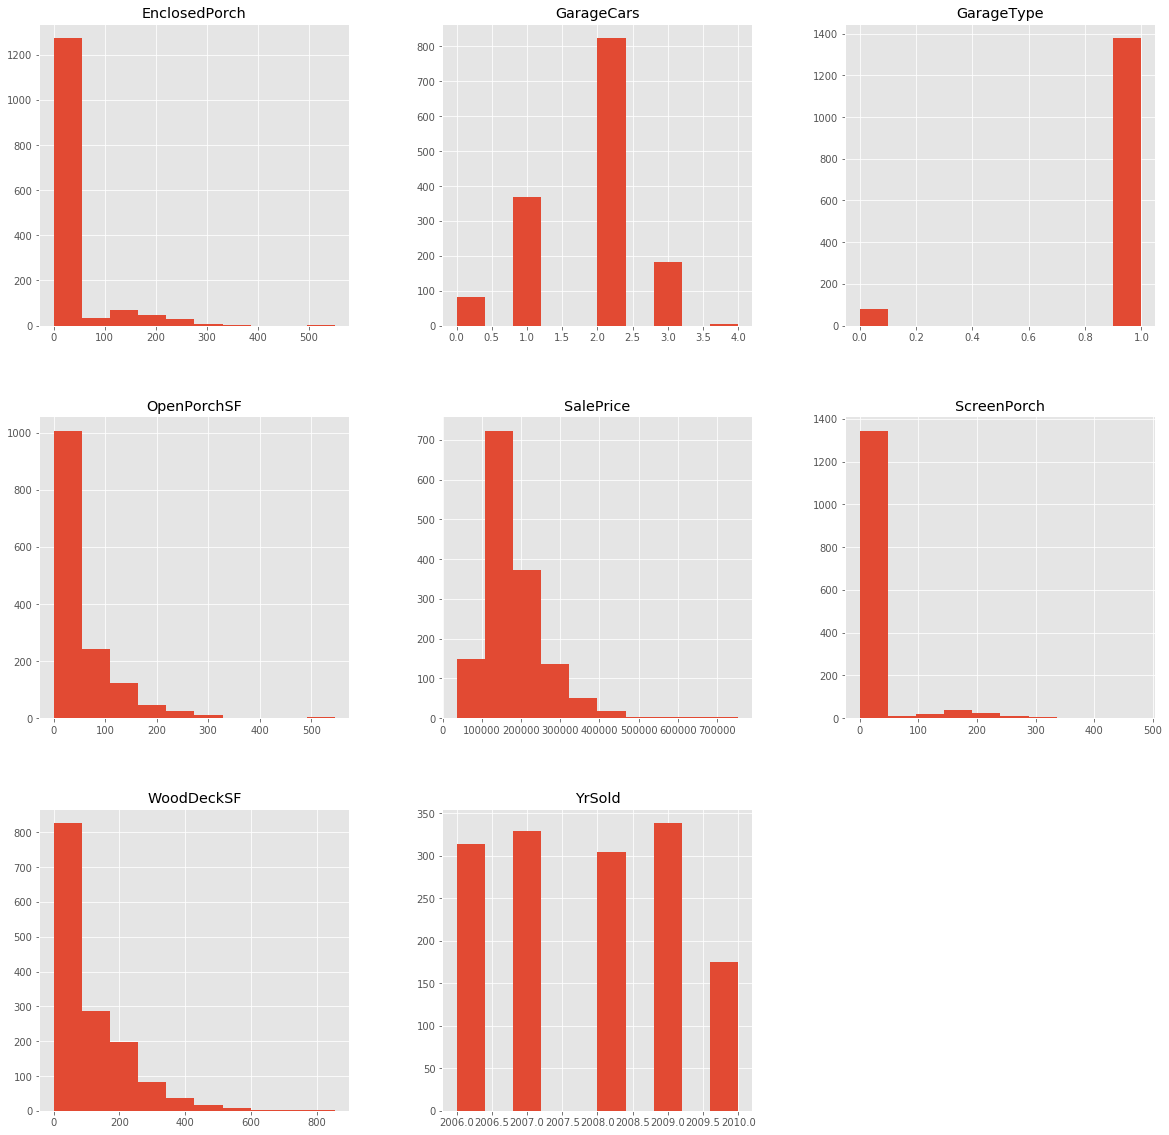

In [368]:
df.hist(figsize = (20, 20))

In [369]:
df.describe()

,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.944521,1.767123,94.244521,46.660274,21.954110,15.060959,2007.815753,180921.195890
std,0.228992,0.747315,125.338794,66.256028,61.119149,55.757415,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,2009.000000,214000.000000
max,1.000000,4.000000,857.000000,547.000000,552.000000,480.000000,2010.000000,755000.000000


In [370]:
#Garagecars
df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [371]:
# GarageCond - Changed NA to 'No Garage' then changed to binary
df.loc[:,("GarageCond")] = df["GarageCond"].fillna("No Garage")
df['GarageCond'] = [0 if x == 'No Garage' else 1 for x in df.GarageCond]
df['GarageCond'].value_counts()

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    1379
0      81
Name: GarageCond, dtype: int64

(array([  81.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1379.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

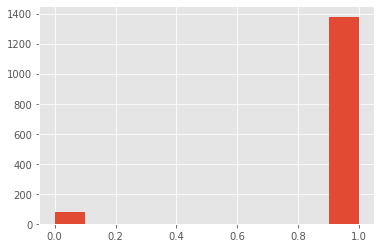

In [372]:
from matplotlib import pyplot as plt
plt.hist(df['GarageCond'])

<BarContainer object of 1460 artists>

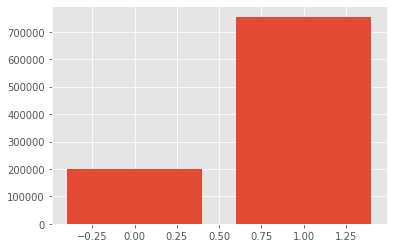

In [373]:
plt.bar(df['GarageCond'], df['SalePrice'])

In [375]:
#Dummify PavedDrive - converted to binary
df['PavedDrive'] = [0 if x == 'N' else 1 for x in df.PavedDrive]
df['PavedDrive'].unique()

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0], dtype=int64)

(array([  90.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1370.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

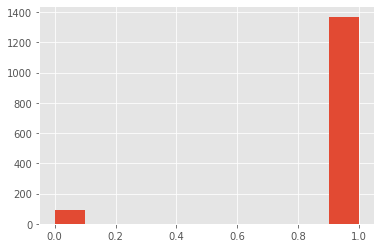

In [376]:
plt.hist(df['PavedDrive'])

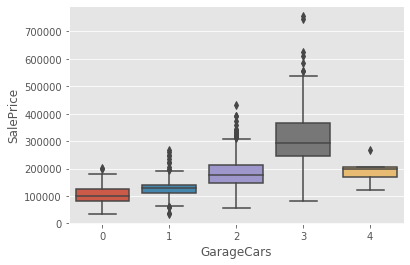

In [329]:
#Distribution of Garage Cars Capacity vs. Sale Price 
import seaborn as sns
sns.boxplot(df['GarageCars'], df['SalePrice'])

In [330]:
#Sum: OpenPorchSF + EnclosedPorch + ScreenPorch
total_sum= df["OpenPorchSF"]+ df["EnclosedPorch"] + df["ScreenPorch"]
df['Total.Porch'] = total_sum
df['Total.Porch']


C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        61
1         0
2        42
3       307
4        84
       ... 
1455     40
1456      0
1457     60
1458    112
1459     68
Name: Total.Porch, Length: 1460, dtype: int64

In [381]:
#Binary of each OpenPorchSF , EnclosedPorch , ScreenPorch in separate new columns
df['New.OpenPorchSF'] = [0 if x == 0 else 1 for x in df.OpenPorchSF]
df['New.EnclosedPorch'] = [0 if x == 0 else 1 for x in df.EnclosedPorch]
df['New.ScreenPorch'] = [0 if x == 0 else 1 for x in df.ScreenPorch]
df

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,GarageType,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice,New.OpenPorchSF,New.EnclosedPorch,New.ScreenPorch
0,1,2,1,1,0,61,0,0,2008,WD,Normal,208500,1,0,0
1,1,2,1,1,298,0,0,0,2007,WD,Normal,181500,0,0,0
2,1,2,1,1,0,42,0,0,2008,WD,Normal,223500,1,0,0
3,1,3,1,1,0,35,272,0,2006,WD,Abnorml,140000,1,1,0
4,1,3,1,1,192,84,0,0,2008,WD,Normal,250000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,2,1,1,0,40,0,0,2007,WD,Normal,175000,1,0,0
1456,1,2,1,1,349,0,0,0,2010,WD,Normal,210000,0,0,0
1457,1,1,1,1,0,60,0,0,2010,WD,Normal,266500,1,0,0
1458,1,1,1,1,366,0,112,0,2010,WD,Normal,142125,0,1,0


In [384]:
# SaleCodition Investigate Subgroups
df["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [299]:
# YrSold
df["YrSold"].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

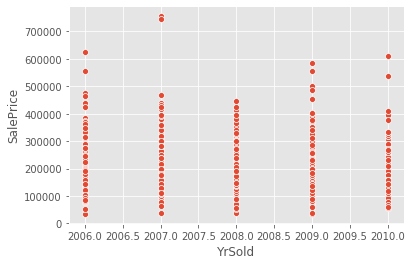

In [332]:
#Doesn't seem like predictor 
sns.scatterplot(df['YrSold'], df['SalePrice'])